<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用-AdaBoost-工具" data-toc-modified-id="使用-AdaBoost-工具-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用 AdaBoost 工具</a></span></li><li><span><a href="#预测房价" data-toc-modified-id="预测房价-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>预测房价</a></span></li><li><span><a href="#AdaBoost-与决策树模型的比较" data-toc-modified-id="AdaBoost-与决策树模型的比较-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AdaBoost 与决策树模型的比较</a></span></li><li><span><a href="#总结" data-toc-modified-id="总结-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>总结</a></span></li><li><span><a href="#练习" data-toc-modified-id="练习-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>练习</a></span></li></ul></div>

1. AdaBoost 工具的使用，包括使用 AdaBoost 进行分类、回归。
1. 使用其他回归工具，比如决策树回归，对比 AdaBoost 回归和决策树回归的结果。

## 使用 AdaBoost 工具

使用 AdaBoost 做分类：

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier(base_estimator=None, n_estimators=50,
                   learning_rate=1.0, algorithm='SAMME.R',
                   random_state=None)

base_estimator：代表弱分类器，默认使用决策树；

n_estimators：算法的最大迭代次数，每次迭代都会引入一个新的弱分类器来增加原有分类器的组合能力，默认是 50；

learning_rate：学习率，取值在 0~1 之间，默认是 1。如果学习率比较小，那么迭代次数要比较多才能收敛；

algorithm：boosting 算法，可选值包括 SAMME 和 SAMME.R，默认是 SAMME.R。两者的区别在于对弱分类权重的计算方式不同。

random_state：随机数种子。
***

使用 AdaBoost 做回归：

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

AdaBoostRegressor(base_estimator=None, n_estimators=50,
                  learning_rate=1.0, loss="linear", random_state=None)

loss：损失函数。
 - liner：线性（默认）；
 - square：平方；
 - exponential：指数。

## 预测房价

数据集中各指标的含义：<img src="https://static001.geekbang.org/resource/image/42/b7/426dec532f34d7f458e36ee59a6617b7.png" style="width:350px">

使用 AdaBoost 回归模型：

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor

data = load_boston()

train_x, test_x, train_y, test_y = train_test_split(
    data.data, data.target, test_size=0.25, random_state=33)

regressor = AdaBoostRegressor()
regressor.fit(train_x, train_y)
pred_y = regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("房价预测结果 ", pred_y)
print("-" * 30)
print("均方误差 = ", round(mse, 2))

房价预测结果  [19.69701493 11.2        13.52142857 16.90862944 25.77254902 22.82413793
 28.92777778 17.78918919 28.52857143 20.1        27.92293578 31.73956044
 12.53559322 23.55247525 13.31774194 25.33630573 17.20526316 16.4890411
 27.93116279 25.52112676 17.00416667 17.956      17.29166667 20.22264151
 31.84545455 17.35945946 22.75714286 25.33630573 12.53559322 31.37011494
 16.90666667 25.77254902 10.71875    21.55       26.27878788 31.73956044
 26.27878788 11.91315789 13.9546875  23.85555556 15.06860465 12.74025974
 30.23663366 17.22195122 26.27878788 18.772      18.772      19.39642857
 26.66011236 19.69701493 17.00416667 33.05833333 15.61666667 17.20526316
 25.77254902 21.13555556 25.33630573 16.90862944 25.52112676 23.21190476
 19.06111111 16.1097561  44.6125     21.54166667 17.00416667 26.21531532
 26.21531532 11.62666667 17.476      27.93116279 23.08395722 18.43842795
 17.00416667 27.21285714 19.39642857 45.91428571 16.1097561  10.81875
 17.35945946 23.85555556 20.744      14.1      

***
使用决策树回归模型和 KNN 回归模型：

In [7]:
# 使用决策树回归模型
from sklearn.tree import DecisionTreeRegressor
dec_regressor=DecisionTreeRegressor()
dec_regressor.fit(train_x,train_y)
pred_y = dec_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("决策树均方误差 = ",round(mse,2))


# 使用KNN回归模型
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor()
knn_regressor.fit(train_x,train_y)
pred_y = knn_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("KNN 均方误差 = ",round(mse,2))

决策树均方误差 =  37.45
KNN 均方误差 =  27.87


## AdaBoost 与决策树模型的比较

使用 sklearn 中的 make_hastie_10_2 函数生成二分类数据。假设生成 12000 个数据，提取前 2000 个作为测试集，其余作为训练集。而后编写代码如下：

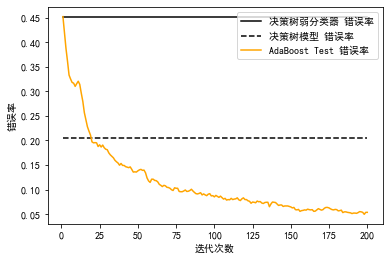

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

train_x, train_y = X[2000:], y[2000:]
test_x, test_y = X[:2000], y[:2000]

# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0 - dt_stump.score(test_x, test_y)

# 决策树
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
dt_err = 1.0 - dt.score(test_x, test_y)

# AdaBoost 分类器
n_estimators = 200
ada = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=n_estimators)
ada.fit(train_x, train_y)

# 可视化
fig = plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei']
ax = fig.add_subplot(111)
ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-', label=u"决策树弱分类器 错误率")
ax.plot([1, n_estimators], [dt_err] * 2, 'k--', label=u"决策树模型 错误率")
ada_err = np.zeros((n_estimators,))

for i, pred_y in enumerate(ada.staged_predict(test_x)):
    ada_err[i] = zero_one_loss(pred_y, test_y)

ax.plot(np.arange(n_estimators)+1, ada_err,
        label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()

## 总结

![](https://static001.geekbang.org/resource/image/6c/17/6c4fcd75a65dc354bc65590c18e77d17.png)

## 练习

使用 AdaBoost 算法对第十九篇的泰坦尼克号的生存做预测，看看它和决策树模型，谁的准确率更高。

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction import DictVectorizer

train_data = pd.read_csv('./datasets/train.csv')
test_data = pd.read_csv('./datasets/test.csv')

train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]

dvec = DictVectorizer(sparse=False)
train_features = dvec.fit_transform(train_features.to_dict(orient='record'))
test_features = dvec.transform(test_features.to_dict(orient='record'))

# 决策树弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(train_features, train_labels)

print(u'决策树弱分类器准确率为 %.4lf' % np.mean(cross_val_score(
    dt_stump, train_features, train_labels, cv=10)))

# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_features, train_labels)

print(u'决策树分类器准确率为 %.4lf' %
      np.mean(cross_val_score(dt, train_features, train_labels, cv=10)))

# AdaBoost 分类器
ada = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=200)
ada.fit(train_features, train_labels)

print(u'AdaBoost 分类器准确率为 %.4lf' %
      np.mean(cross_val_score(ada, train_features, train_labels, cv=10)))

决策树弱分类器准确率为 0.7867
决策树分类器准确率为 0.7779
AdaBoost 分类器准确率为 0.8138
